# AHCR CNN Project
## Prepared by Qutaiba Olayyan

In [2]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import itertools
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet, VGG16 # Task 3
from tensorflow.keras.models import Model
from keras.models import load_model # Task 4


import warnings

In [4]:
# filter warnings
warnings.filterwarnings('ignore')

# Reading AHCR Dataset

In [5]:
AHCR_DATASET_PATH = "/kaggle/input/achr-dataset"
TRAINING_IMAGES_PATH = f"{AHCR_DATASET_PATH}/csvTrainImages 13440x1024.csv"
TRAINING_LABELS_PATH = f"{AHCR_DATASET_PATH}/csvTrainLabel 13440x1.csv"
TESTING_IMAGES_PATH = f"{AHCR_DATASET_PATH}/csvTestImages 3360x1024.csv"
TESTING_LABELS_PATH = f"{AHCR_DATASET_PATH}/csvTestLabel 3360x1.csv"

In [6]:
x_train = pd.read_csv(TRAINING_IMAGES_PATH, header=None)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


In [7]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = pd.read_csv(TRAINING_LABELS_PATH, header=None, names=['label'])
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   13440 non-null  int64
dtypes: int64(1)
memory usage: 105.1 KB


In [7]:
y_train.head()

,label
0,1
1,1
2,1
3,1
4,1


In [9]:
x_test = pd.read_csv(TESTING_IMAGES_PATH, header=None)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 26.3 MB


In [9]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_test = pd.read_csv(TESTING_LABELS_PATH, header=None, names=['label'])
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   3360 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB


In [11]:
y_test.head()

,label
0,1
1,1
2,2
3,2
4,3


Each character has: 480 samples


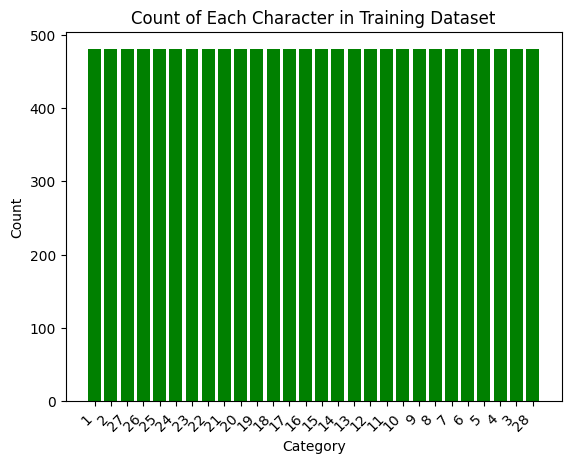

In [11]:
# visualize number of character classes in training data
category_counts = y_train.value_counts()
print(f'Each character has: {category_counts.values[0]} samples')

# Extract values from the MultiIndex
category_labels = [str(label[0]) for label in category_counts.index]

# Plot the bar chart
plt.bar(category_labels, category_counts.values, color='green')

# Customize the plot
plt.title('Count of Each Character in Training Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of category labels

# Show the plot
plt.show()

Each character has: 120 samples


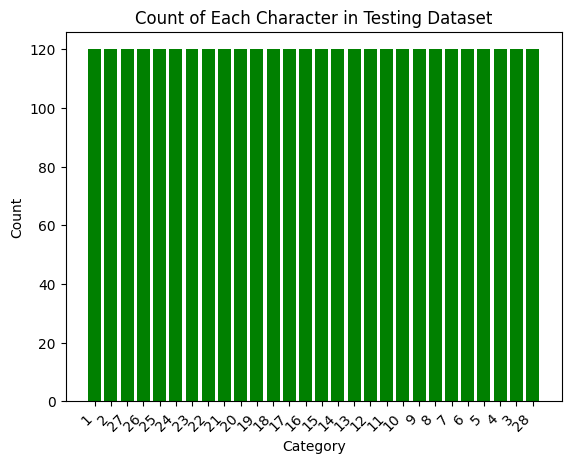

In [12]:
# visualize number of character classes in testing data
category_counts = y_test.value_counts()
print(f'Each character has: {category_counts.values[0]} samples')

# Extract values from the MultiIndex
category_labels = [str(label[0]) for label in category_counts.index]

# Plot the bar chart
plt.bar(category_labels, category_counts.values, color='green')

# Customize the plot
plt.title('Count of Each Character in Testing Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of category labels

# Show the plot
plt.show()

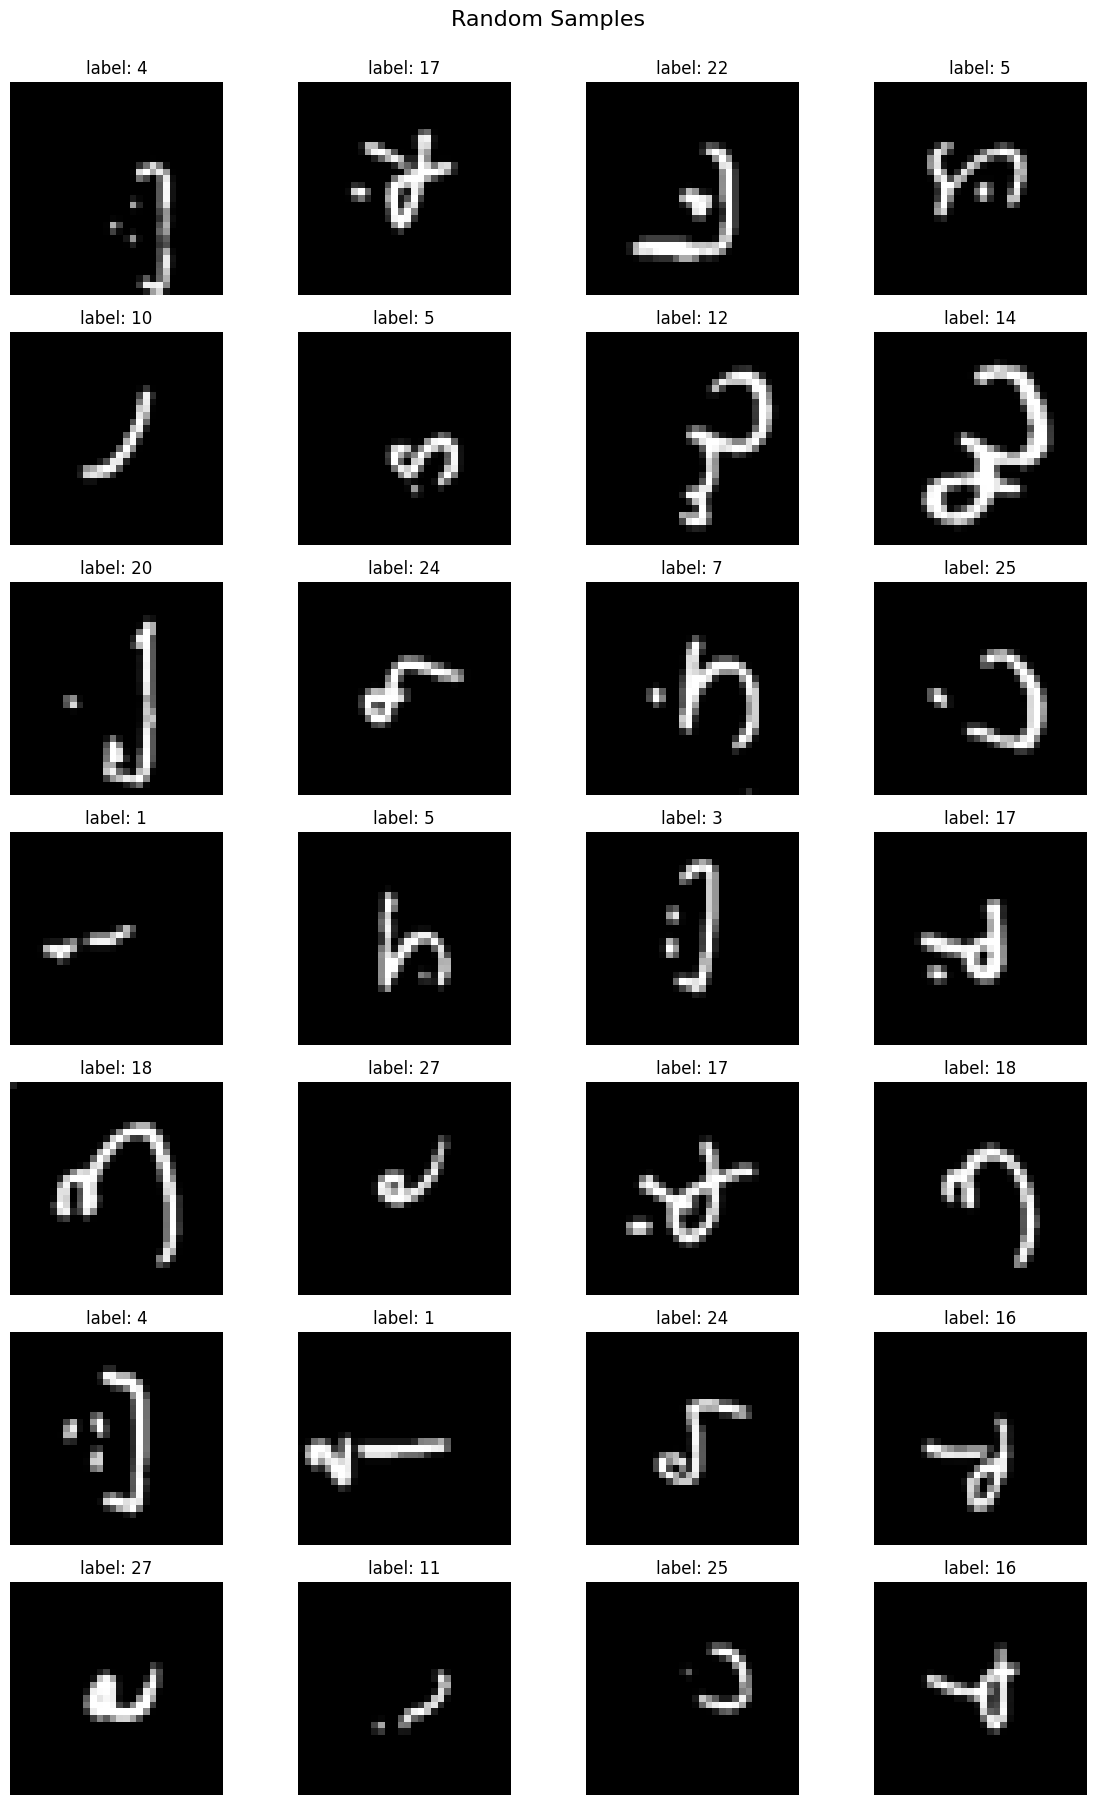

In [13]:
# Set the number of rows and columns for subplots
num_rows = 7
num_cols = 4

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the samples
for i in range(num_rows * num_cols):
    random_index = random.randint(0, 13439)
    img = x_train.iloc[random_index].to_numpy().reshape((32, 32))
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'label: {str(y_train.iloc[random_index][0])}')
    axes[i].axis("off")

# Set the title for the entire figure
fig.suptitle("Random Samples", fontsize=16, y=1)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


## Analysis of AHCR Dataset

### Overview

In the preceding results, the examination of the AHCR (Arabic Handwritten Characters Recognition) dataset was conducted. The dataset comprises two subsets designated for training and testing purposes. Specifically, there are **13,440 samples allocated for training and 3,360 samples for testing**.

**Each image in the dataset has dimensions of 32x32 pixels**.

### Dataset Composition

The AHCR dataset encompasses a total of **28 Arabic characters**, represented as labels ranging from 1 to 28. The distribution of these **characters is well-balanced** across both the training and testing datasets.

#### Training Dataset

For the **training dataset, each of the 28 characters is associated with 480 samples**, ensuring an equitable representation of each character in the training set.

#### Testing Dataset

Similarly, the **testing dataset contains 120 samples** for each of the 28 characters, maintaining a balanced distribution for evaluation purposes.

### Visualization

To provide a **visual representation of the dataset**, a plot showcasing 28 random samples of characters was generated. This visualization aids in understanding the diversity and characteristics of the Arabic characters present in the AHCR dataset.


# Data Preprocessing: Normalization, Reshape, and Label Encoding

## Normalization

To mitigate the impact of illumination differences, we implement grayscale normalization. This process **enhances the performance of the Convolutional Neural Network (CNN)** by ensuring uniformity in image brightness.

### Reshape

For both training and testing images with dimensions of **32 x 32 pixels**, we undertake a reshaping process to transform the data into **3D matrices of size 32x32x1**. This adjustment is crucial for compatibility with Keras, which necessitates an additional dimension at the end corresponding to channels. Given that our images are grayscale, only one channel is utilized.

## Label Encoding

The encoding of labels into one-hot vectors is a pivotal step in preparing the target variable for model training. This conversion translates class labels into binary vectors, where each element signifies the presence or absence of a specific class. For instance:

- Label 3 is encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...]
- Label 6 is encoded as [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...]

This encoding scheme facilitates categorical representation and is crucial for training a robust machine learning model.


In [14]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (13440, 1024)
x_test shape:  (3360, 1024)


In [15]:
# Reshape
x_train = x_train.values.reshape(-1,32,32,1)
x_test = x_test.values.reshape(-1,32,32,1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (13440, 32, 32, 1)
x_test shape:  (3360, 32, 32, 1)


In [16]:
# Label Encoding 
# Subtract 1 to make the labels compatible with to_categorical
y_train = to_categorical(y_train - 1, num_classes = 28)
y_test = to_categorical(y_test - 1, num_classes = 28)
print("x_train Encoding Shape: ",y_train.shape)
print("x_test Encoding Shape: ",y_test.shape)

x_train Encoding Shape:  (13440, 28)
x_test Encoding Shape:  (3360, 28)


# Training and Validation Dataset Split

We split the data into training and validation sets.
- val size is 10%.
- train size is 90%.

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=48)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (12096, 32, 32, 1)
x_val shape (1344, 32, 32, 1)
y_train shape (12096, 28)
y_val shape (1344, 28)


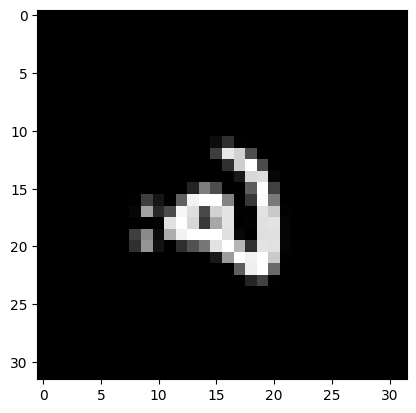

In [18]:
# Example
plt.imshow(X_train[1563][:,:,0],cmap='gray')
plt.show()


<h1 style="text-align: center;">
  Convolutional Neural Network Pipeline
</h1>


<hr>


<p style="text-align: center;">
  <img src="https://www.mdpi.com/sensors/sensors-23-06774/article_deploy/html/images/sensors-23-06774-g002-550.jpg" alt="CNN Pipeline" title="CNN Pipeline">
</p>

1. **Zero Padding:**
   - Apply zero padding based on the filter size.
<p style="text-align: center;">
  <img src="https://media5.datahacker.rs/2018/11/sl_1.png" alt="Padding" title="Zero Padding">
</p>

2. **Convolutional Filters:**
   - Utilize convolutional filters of size 3x3.
   
  <p style="text-align: center;">
  <img src="https://qph.cf2.quoracdn.net/main-qimg-578748437404fe6733bc7823755e813c.webp" alt="Convolutional Filters" title="Convolutional Filters">
</p>

3. **2D Convolutional Layers:**
   - Use four sequential 2D convolutional layers.
   - Set filter counts as follows: 16, 32, 64, 128.
   - Apply ReLU activation after each convolution.
   
   <p style="text-align: center;">
  <img src="https://i.imgur.com/EolgnXi.jpgg" alt="ReLU">
</p>

4. **Pooling Layers:**
   - After every 2D convolutions:
     - Implement 2D max pooling with a stride of 1.
     - Resulting in four pooling layers in the system.
     
     <p style="text-align: center;">
  <img src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/05/max_pooling_demo-1024x546.png?lossy=2&strip=1&webp=1" alt="Max Pooling" title="Max Pooling">
</p>

5. **Dropout and Flattening:**
   - After the last pooling layer:
     - Apply dropout with a rate of 0.2.
     - Flatten the output.
     
     <p style="text-align: center;">
  <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*iWQzxhVlvadk6VAJjsgXgg.png" alt="Dropout" title="Dropout">
</p>
     
     <p style="text-align: center;">
  <img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png" alt="Flatten" title="Flatten">
</p>

6. **Fully Connected Neural Network:**
   - Start with a Dense layer of 512 neurons.
   - Follow with a dropout layer having a rate of 0.4.
   
   <p style="text-align: center;">
  <img src="https://indiantechwarrior.com/wp-content/uploads/2023/08/Hidden-Layer-1-1024x603-min.jpg" alt="Full Connection" title="Full Connection">
</p>


7. **Final Dense Layer:**
   - Comprises 28 neurons, representing the 28 character classes.
   - Utilizes softmax activation.



# Implementing with Keras

1. **Input (32x32 Image):**
   - Initial 2D image input.

2. **Conv1 (16 Filters, 3x3 Kernel) + ReLU:**
   - 2D convolution, 16 filters, 3x3 kernel, ReLU activation.

3. **Max Pooling (2x2, 1 Stride):**
   - 2D max pooling, 2x2 window, 1 stride.

4. **Conv2 (32 Filters, 3x3 Kernel) + ReLU:**
   - 2D convolution, 32 filters, 3x3 kernel, ReLU activation.

5. **Max Pooling (2x2, 1 Stride):**
   - 2D max pooling, 2x2 window, 1 stride.

6. **Conv3 (64 Filters, 3x3 Kernel) + ReLU:**
   - 2D convolution, 64 filters, 3x3 kernel, ReLU activation.

7. **Max Pooling (2x2, 1 Stride):**
   - 2D max pooling, 2x2 window, 1 stride.

8. **Conv4 (128 Filters, 3x3 Kernel) + ReLU:**
   - 2D convolution, 128 filters, 3x3 kernel, ReLU activation.

9. **Max Pooling (2x2, 1 Stride):**
   - 2D max pooling, 2x2 window, 1 stride.

10. **Dropout (Rate 0.2):**
    - Introduce dropout with a rate of 0.2.

11. **Flatten:**
    - Flatten the output for fully connected layers.

12. **Dense1 (512 Neurons) + ReLU:**
    - Fully connected layer, 512 neurons, ReLU activation.

13. **Dropout (Rate 0.4):**
    - Introduce dropout with a rate of 0.4.

14. **Output Dense (28 Neurons) + Softmax:**
    - Final fully connected layer, 28 neurons, softmax activation.


In [20]:
def cnn_model():
    model = Sequential()

    # Feature Extraction
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
    model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(1, 1)))

    model.add(Dropout(0.2))

    # Classification
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(28, activation = "softmax"))
    
    return model

In [21]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 64)        0

### **Define Optimizer and Cross Entropy Loss** 
#### Adam optimizer: with learning rate 0.001

In [22]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

<p style="text-align: center;">
  <img src="https://www.researchgate.net/publication/368742217/figure/fig4/AS:11431281122037810@1677166365733/Categorical-cross-entropy.jpg" alt="Softmax and CrossEntropy" title="Softmax and CrossEntropy">
</p>

In [23]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Epochs and Batch Size
- Imagine you have a dataset consisting of 15 examples. Setting a batch size of 3 and planning for 4 epochs implies the algorithm will work with subsets of the data. In each epoch, the dataset is divided into 5 batches (15/3 = 5). This arrangement results in 5 iterations for every epoch, with each batch undergoing processing through the algorithm.

In [19]:
epochs = 30  # for better result increase the epochs
batch_size = 250

### Plot the accuracy and loss per epoch for the training and validation dataset

In [20]:
def plot_accuracy_and_loss_curves(hist):
    plt.title('Model Accuracy')
    plt.plot(hist.history['accuracy'],label='train')
    plt.plot(hist.history['val_accuracy'],label='validation')
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    plt.title('Model Loss')
    plt.plot(hist.history['loss'],label='train')
    plt.plot(hist.history['val_loss'],label='validation')
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

### Find the model performance and confusion matrix for testing dataset

In [21]:
def performance(cnn_model, inputs, real_labels):
    # Predict the values from the testing dataset
    Y_pred = cnn_model.predict(inputs)
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert testing observations to one hot vectors
    Y_true = np.argmax(real_labels,axis = 1) 

    # Calculate accuracy
    accuracy = accuracy_score(Y_true, Y_pred_classes)

    # Calculate precision and recall
    precision = precision_score(Y_true, Y_pred_classes, average='weighted')
    recall = recall_score(Y_true, Y_pred_classes, average='weighted')

    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

    # Plot the confusion matrix with accuracy in the title
    f, ax = plt.subplots(figsize=(16, 16))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%\nPrecision: {precision * 100:.2f}%\nRecall: {recall * 100:.2f}%")
    plt.show()

# Task 1: Build and train a custom CNN network for AHCR. 

In [27]:
# Fit the model
history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(X_val, Y_val))

Epoch 1/30
49/49 [==============================] - 146s 3s/step - loss: 1.7939 - accuracy: 0.4632 - val_loss: 0.6857 - val_accuracy: 0.7835
Epoch 2/30
49/49 [==============================] - 144s 3s/step - loss: 0.5841 - accuracy: 0.8105 - val_loss: 0.4262 - val_accuracy: 0.8638
Epoch 3/30
49/49 [==============================] - 144s 3s/step - loss: 0.3362 - accuracy: 0.8880 - val_loss: 0.2849 - val_accuracy: 0.9077
Epoch 4/30
49/49 [==============================] - 143s 3s/step - loss: 0.2298 - accuracy: 0.9228 - val_loss: 0.2418 - val_accuracy: 0.9226
Epoch 5/30
49/49 [==============================] - 144s 3s/step - loss: 0.1592 - accuracy: 0.9472 - val_loss: 0.2006 - val_accuracy: 0.9412
Epoch 6/30
49/49 [==============================] - 144s 3s/step - loss: 0.1344 - accuracy: 0.9559 - val_loss: 0.2074 - val_accuracy: 0.9360
Epoch 7/30
49/49 [==============================] - 144s 3s/step - loss: 0.0934 - accuracy: 0.9671 - val_loss: 0.2210 - val_accuracy: 0.9375
Epoch 8/30
49

In [28]:
model.save('task1.h5')

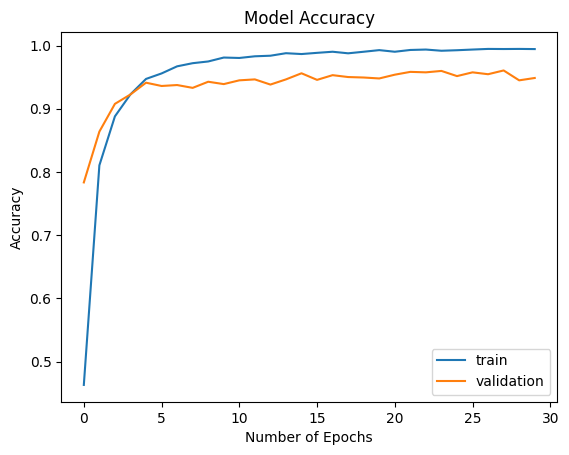

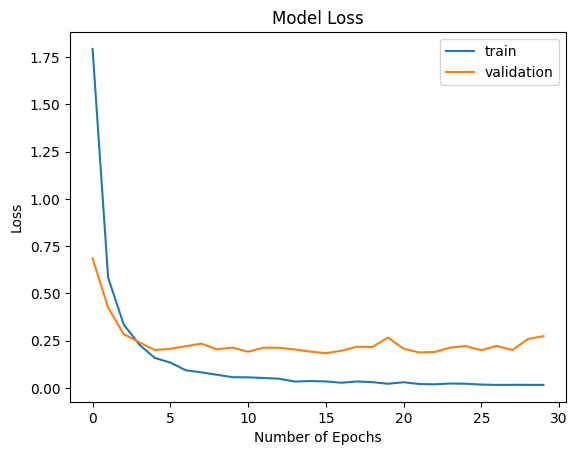

In [29]:
# Plot the accuracy and loss per epoch for the training and validation dataset
plot_accuracy_and_loss_curves(history)

105/105 [==============================] - 11s 108ms/step


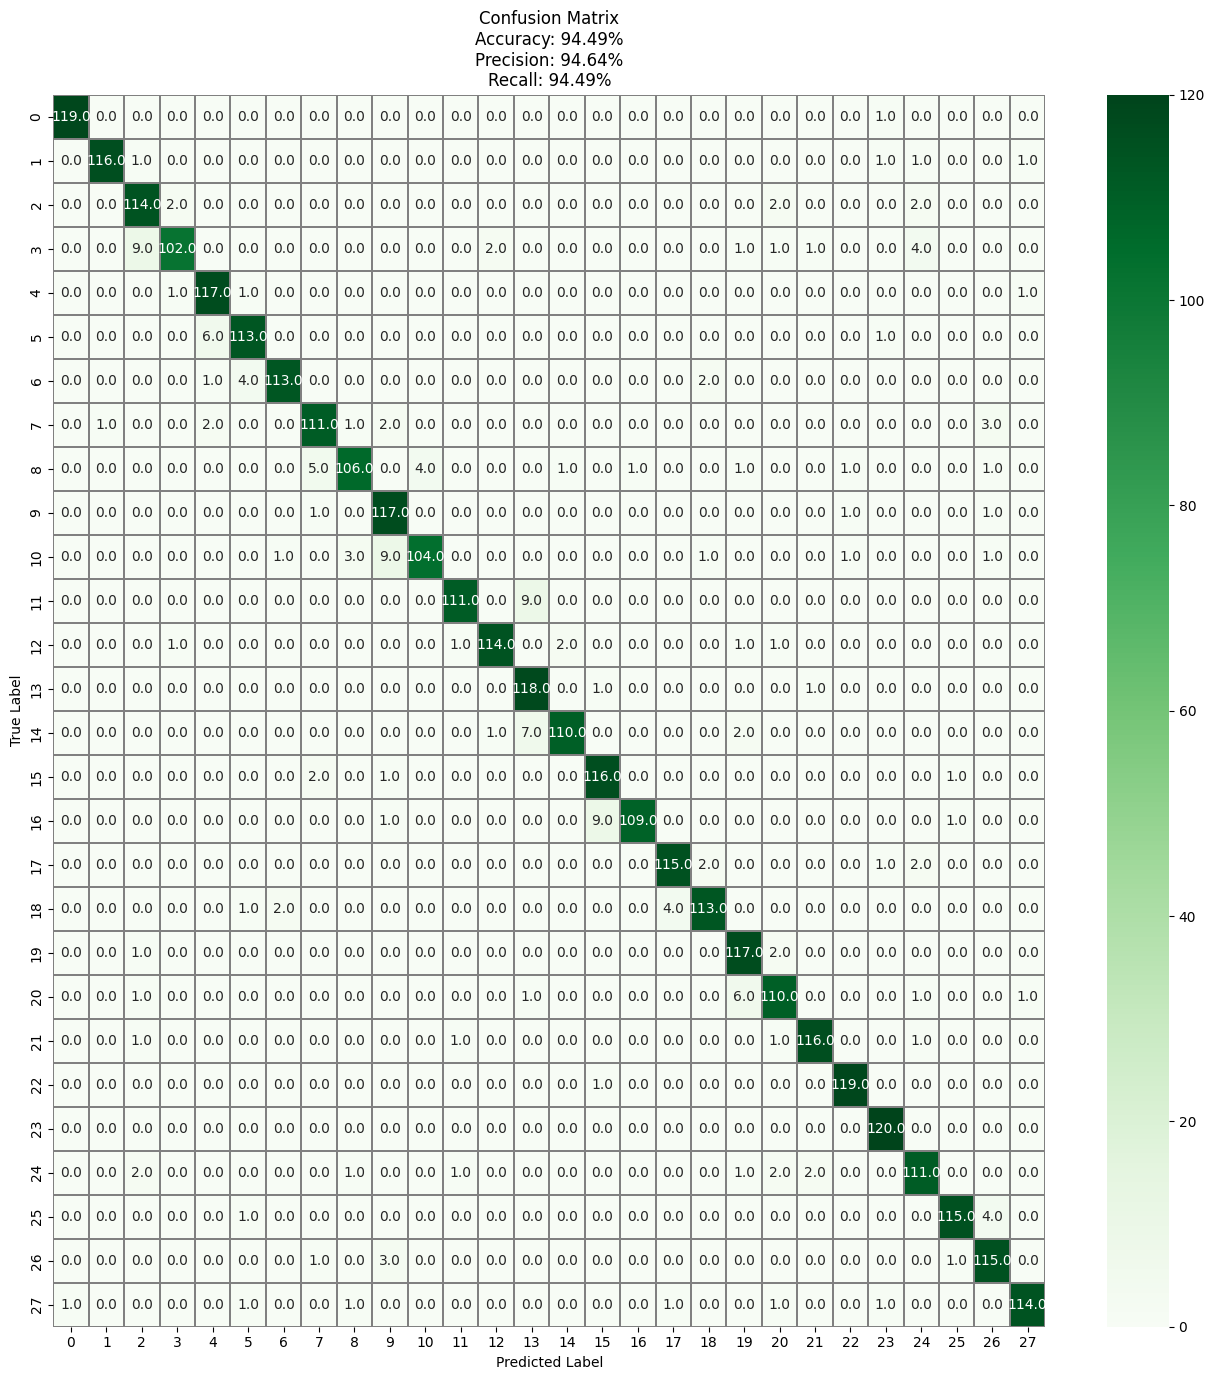

In [30]:
# Find the model performance and confusion matrix for testing dataset
performance(model, x_test, y_test)

# Task 2: Retrain the network selected from Task 1 after doing data augmentation.

In [31]:
model = cnn_model()
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Data Augmentation Configuration
<p>Data augmentation is for giving our model more pictures to learn from. Instead of having only a few, we make more pictures by turning them around, zooming in, or flipping them. This helps the model get better at recognizing things, even if they look a little different. It's like practicing with different puzzles to become really good at solving them. So, data augmentation helps our model be smart and understand lots of things, even if there aren't many pictures to learn from.</p>

- **rotation_range**: `15`
  - Randomly rotate images in the range of 15 degrees.

- **zoom_range**: `0.1`
  - Randomly zoom images by 1%.

- **width_shift_range**: `0.1`
  - Randomly shift images horizontally by 10%.

- **height_shift_range**: `0.1`
  - Randomly shift images vertically by 10%.

- **shear_range**: `0.2`
  - Apply shear transformation with a maximum shear angle of 0.2 radians


### Data Augmentation Application:

Before training the model, the data generator is fitted to the training data (`X_train`). This ensures that the augmentation transformations are appropriately configured based on the statistics of the dataset.


<p style="text-align: center;">
  <img src="https://www.researchgate.net/profile/Filippo-Maria-Castelli/publication/344124917/figure/fig7/AS:932613439098880@1599363779358/Data-Augmentation.ppm" alt="Data Augmentation" title="Data Augmentation">
</p>

In [22]:
# data augmentation
# Reference: https://github.com/Curt-Park/handwritten_digit_recognition/blob/master/utils.py
datagen = ImageDataGenerator(
    rotation_range=15,          # Randomly rotate images in the range of 15 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by 10%
    height_shift_range=0.1,     # Randomly shift images vertically by 10%
    shear_range=0.2,            # Apply shear transformation with a maximum shear angle of 0.2 radians
    zoom_range=0.1              # Randomly zoom images by 10%
)

datagen.fit(X_train)

In [33]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
48/48 [==============================] - 146s 3s/step - loss: 2.2839 - accuracy: 0.3253 - val_loss: 0.9504 - val_accuracy: 0.6979
Epoch 2/30
48/48 [==============================] - 144s 3s/step - loss: 1.0203 - accuracy: 0.6638 - val_loss: 0.4525 - val_accuracy: 0.8504
Epoch 3/30
48/48 [==============================] - 143s 3s/step - loss: 0.6602 - accuracy: 0.7816 - val_loss: 0.3100 - val_accuracy: 0.8966
Epoch 4/30
48/48 [==============================] - 144s 3s/step - loss: 0.4998 - accuracy: 0.8372 - val_loss: 0.2879 - val_accuracy: 0.9025
Epoch 5/30
48/48 [==============================] - 144s 3s/step - loss: 0.4115 - accuracy: 0.8647 - val_loss: 0.2324 - val_accuracy: 0.9196
Epoch 6/30
48/48 [==============================] - 144s 3s/step - loss: 0.3439 - accuracy: 0.8851 - val_loss: 0.1867 - val_accuracy: 0.9382
Epoch 7/30
48/48 [==============================] - 144s 3s/step - loss: 0.3218 - accuracy: 0.8939 - val_loss: 0.1654 - val_accuracy: 0.9457
Epoch 8/30
48

In [34]:
model.save('task2.h5')

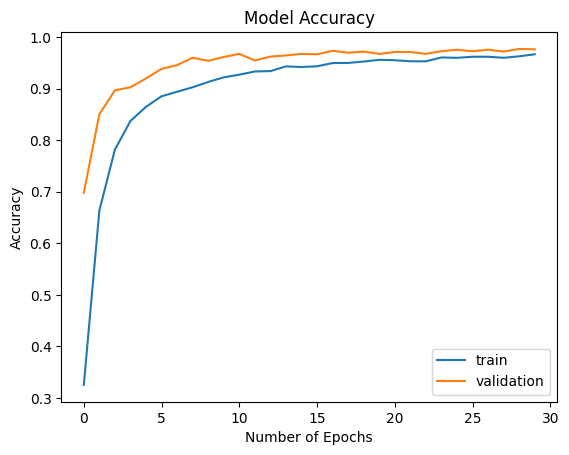

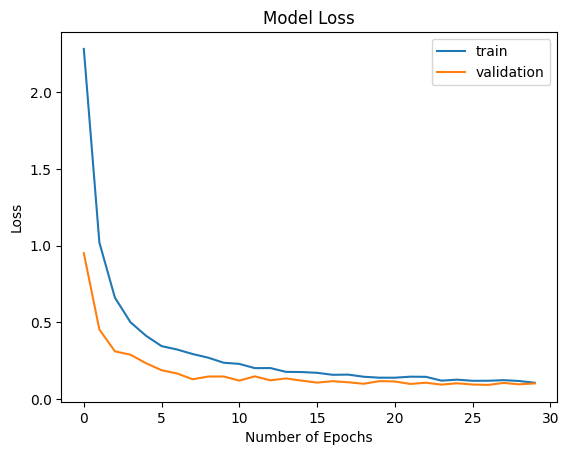

In [35]:
# Plot the accuracy and loss per epoch for the training and validation dataset
plot_accuracy_and_loss_curves(history)

105/105 [==============================] - 11s 101ms/step


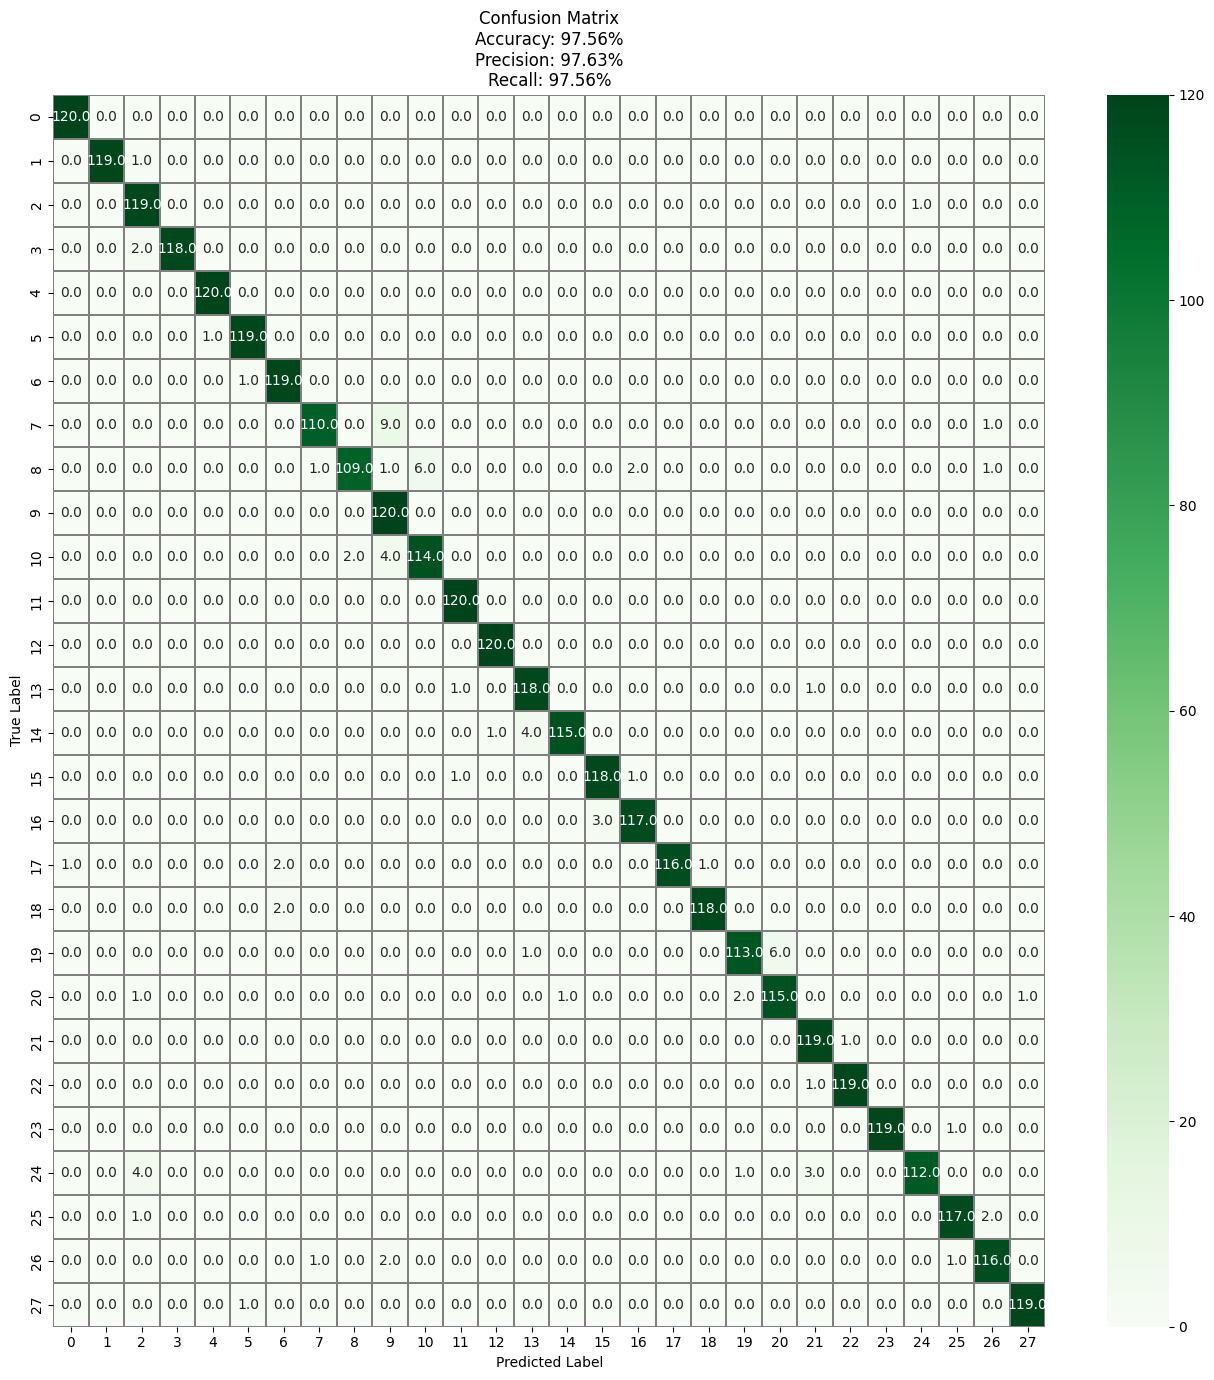

In [36]:
# Find the model performance and confusion matrix for testing dataset
performance(model, x_test, y_test)

# Task 3: Create **MobileNet** model without pre-trained weights

**Number of Classes:**
Set the variable `num_classes` to 28, representing the number of classes in the classification task.

**Input Layer:**
Defined an input layer with a shape of (32, 32, 1), indicating images with dimensions 32x32 pixels and a single channel (grayscale).

**Base MobileNet Model:**
Instantiated a MobileNet model without pre-trained weights, serving as the base architecture for feature extraction. The specified input tensor matches the defined input layer. after removing the last layer from the MobileNet base model.


**Softmax Layers for Classification:**
The output layer has a softmax activation function with the number of units corresponding to the defined `num_classes`.

**Custom Model:**
Constructed a custom model by specifying the input and output layers.

**Compilation:**
Compiled the model using the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.

**Model Summary:**
Displayed the summary of the created model using `model.summary()`.


In [24]:
# Create an input layer with the specified shape
input_tensor = Input(shape=(32, 32, 1))

# Get MobileNet model without weights
base_model = MobileNet(weights=None, include_top=True, input_tensor=input_tensor)

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        288       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32) 

In [25]:
# number of characters
num_classes = 28

# Delete the last softmax layer from MobileNet
# then add our softmax layer with the specified number of classes
output_layer = Dense(num_classes, activation='softmax')(base_model.layers[-2].output)

# Create the custom model
model = Model(inputs=base_model.input, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        288       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32)        128   

In [26]:
# Compile the model and specify the appropriate loss and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
48/48 [==============================] - 110s 2s/step - loss: 3.7663 - accuracy: 0.0796 - val_loss: 3.3340 - val_accuracy: 0.0387
Epoch 2/30
48/48 [==============================] - 97s 2s/step - loss: 2.8297 - accuracy: 0.1708 - val_loss: 3.3841 - val_accuracy: 0.0275
Epoch 3/30
48/48 [==============================] - 97s 2s/step - loss: 2.3579 - accuracy: 0.2523 - val_loss: 3.4532 - val_accuracy: 0.0417
Epoch 4/30
48/48 [==============================] - 96s 2s/step - loss: 2.0286 - accuracy: 0.3388 - val_loss: 3.6106 - val_accuracy: 0.0417
Epoch 5/30
48/48 [==============================] - 96s 2s/step - loss: 1.7574 - accuracy: 0.4114 - val_loss: 3.9863 - val_accuracy: 0.0275
Epoch 6/30
48/48 [==============================] - 98s 2s/step - loss: 1.5041 - accuracy: 0.4877 - val_loss: 3.8942 - val_accuracy: 0.0275
Epoch 7/30
48/48 [==============================] - 98s 2s/step - loss: 1.2818 - accuracy: 0.5533 - val_loss: 4.0479 - val_accuracy: 0.0417
Epoch 8/30
48/48 [=

In [28]:
model.save('task3.h5')

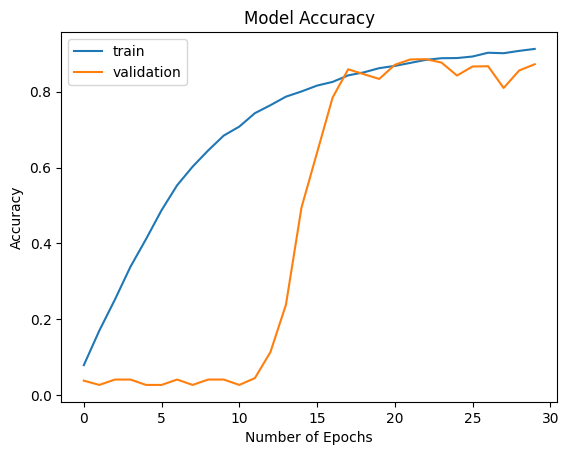

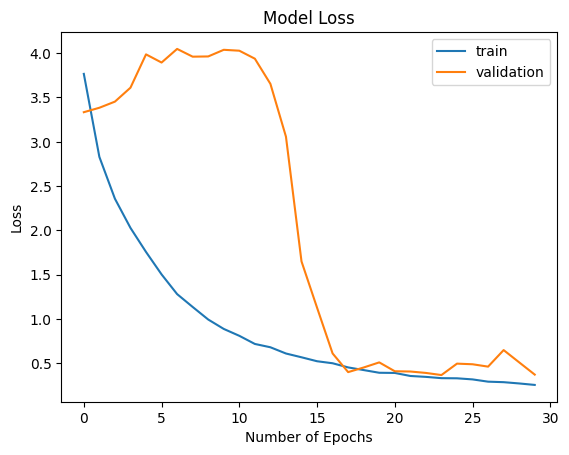

In [29]:
# Plot the accuracy and loss per epoch for the training and validation dataset
plot_accuracy_and_loss_curves(history)

105/105 [==============================] - 4s 28ms/step


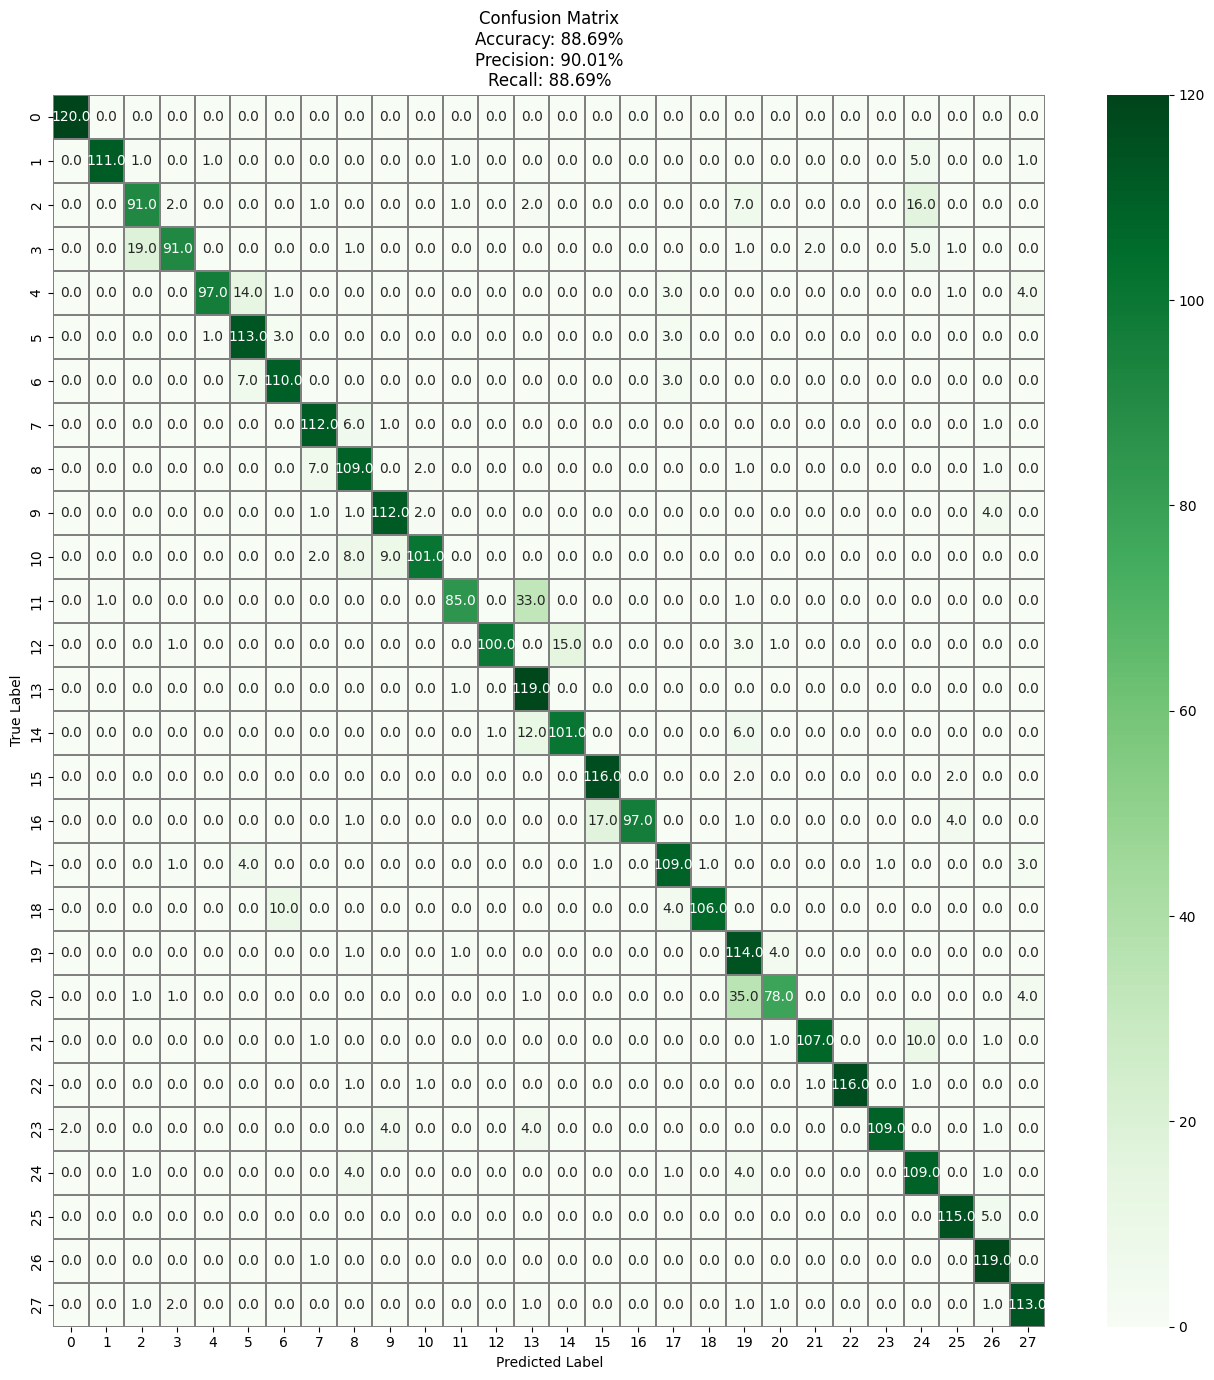

In [30]:
# Find the model performance and confusion matrix for testing dataset
performance(model, x_test, y_test)

# Task 4: Use pre-trained **ResNet** Architecture, then fine-tune the model on our dataset

**Number of Classes:**
Set the variable `num_classes` to 28, indicating the number of classes in your classification task.

**Pre-trained ResNet:**
Utilize a **[pre-trained ResNet](https://github.com/deepankarvarma/Handwriting-Recognition--OpenCV--Keras-and-TensorFLow/tree/master)** model with weights from the **MNIST and [A_Z Handwritten](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format) dataset**. 
- **A_Z Handwritten dataset**: The dataset contains 26 folders (A-Z) containing handwritten images in size 28*28 pixels, each alphabet in the image is centre fitted to 20*20 pixel box, each image is stored as Gray-level.
- **MNIST dataset**: The dataset consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9)



**Custom Classification Layers:**
The final dense layer uses softmax activation for class probability generation basen on `num_classes`.

**Freezing Convolutional Base:**
- Freezing pre-trained convolutional layers.
- Un-freezing the top convolutional layer.
- Un-freezing Fully-Connected with softmax layer.

**Compilation:**
Compile the model using the Adam optimizer and categorical cross-entropy loss, standard choices for image classification tasks. Optimize for accuracy during training.

**Model Summary:**
Displayed the summary of the fine-tuned model using `model.summary()`.





<div style="text-align: center;">
  <img src="https://storage.googleapis.com/lds-media/images/transfer-learning-feature-extraction-approach.width-1200.jpg" alt="Fine-tuning Approach">
</div>

<div style="text-align: center;">
  <img src="https://storage.googleapis.com/lds-media/images/transfer-learning-fine-tuning-approach.width-1200.jpg" alt="Fine-tuning Approach">
</div>



In [39]:
ResNet_PRETRAINED_MODEL_PATH = '/kaggle/input/resnet-handwriting-model/ResNet_handwriting.model'

# Load the pre-trained ResNet model
full_model = load_model(ResNet_PRETRAINED_MODEL_PATH)

full_model.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 1)            4         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 64)           576       ['batch_normalization[0][0]'] 
                                                                                                  
 batch_normalization_1 (Bat  (None, 32, 32, 64)           256       ['conv2d[0][0]']         

In [47]:
# Create a new model without the last softmax layer
base_model = Model(inputs=full_model.input, outputs=full_model.layers[-2].output)


# Freeze all layers
base_model.trainable = False

# un-freeze the top 7 layers
for layer in base_model.layers[-7:]:
    layer.trainable = True

# Output layer with the specified number of classes
output_layer = Dense(num_classes, activation='softmax')(base_model.output)

# Create the final model by stacking the base model and the new output layer
model = Model(inputs=base_model.input, outputs=output_layer)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 1)            4         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 64)           576       ['batch_normalization[0][0]'] 
                                                                                                  
 batch_normalization_1 (Bat  (None, 32, 32, 64)           256       ['conv2d[0][0]']        

**Just softmax layer will be trainable**

In [48]:
# Print the layers and their trainable status
for layer in model.layers:
    print(layer.name, layer.trainable)

input_1 False
batch_normalization False
conv2d False
batch_normalization_1 False
activation False
conv2d_1 False
batch_normalization_2 False
activation_1 False
conv2d_2 False
batch_normalization_3 False
activation_2 False
conv2d_3 False
conv2d_4 False
add False
batch_normalization_4 False
activation_3 False
conv2d_5 False
batch_normalization_5 False
activation_4 False
conv2d_6 False
batch_normalization_6 False
activation_5 False
conv2d_7 False
add_1 False
batch_normalization_7 False
activation_6 False
conv2d_8 False
batch_normalization_8 False
activation_7 False
conv2d_9 False
batch_normalization_9 False
activation_8 False
conv2d_10 False
add_2 False
batch_normalization_10 False
activation_9 False
conv2d_11 False
batch_normalization_11 False
activation_10 False
conv2d_12 False
batch_normalization_12 False
activation_11 False
conv2d_13 False
conv2d_14 False
add_3 False
batch_normalization_13 False
activation_12 False
conv2d_15 False
batch_normalization_14 False
activation_13 False
conv2

In [49]:
# Step 5: Compile the model and specify the appropriate loss and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
48/48 [==============================] - 45s 871ms/step - loss: 3.7426 - accuracy: 0.1723 - val_loss: 2.2769 - val_accuracy: 0.3690
Epoch 2/30
48/48 [==============================] - 39s 807ms/step - loss: 1.9532 - accuracy: 0.4651 - val_loss: 1.7075 - val_accuracy: 0.5491
Epoch 3/30
48/48 [==============================] - 38s 799ms/step - loss: 1.6109 - accuracy: 0.5913 - val_loss: 1.4929 - val_accuracy: 0.6190
Epoch 4/30
48/48 [==============================] - 41s 852ms/step - loss: 1.4305 - accuracy: 0.6427 - val_loss: 1.3941 - val_accuracy: 0.6287
Epoch 5/30
48/48 [==============================] - 38s 793ms/step - loss: 1.3194 - accuracy: 0.6690 - val_loss: 1.2712 - val_accuracy: 0.6912
Epoch 6/30
48/48 [==============================] - 41s 845ms/step - loss: 1.2418 - accuracy: 0.6942 - val_loss: 1.1993 - val_accuracy: 0.7150
Epoch 7/30
48/48 [==============================] - 38s 794ms/step - loss: 1.1878 - accuracy: 0.7061 - val_loss: 1.1478 - val_accuracy: 0.7091

In [51]:
model.save('task4.h5')

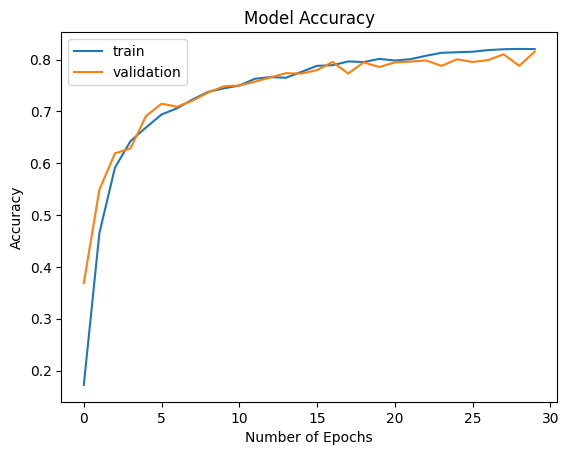

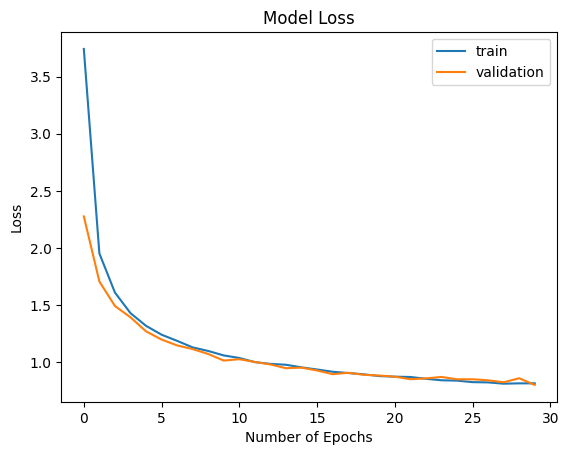

In [52]:
# Plot the accuracy and loss per epoch for the training and validation dataset
plot_accuracy_and_loss_curves(history)

105/105 [==============================] - 7s 63ms/step


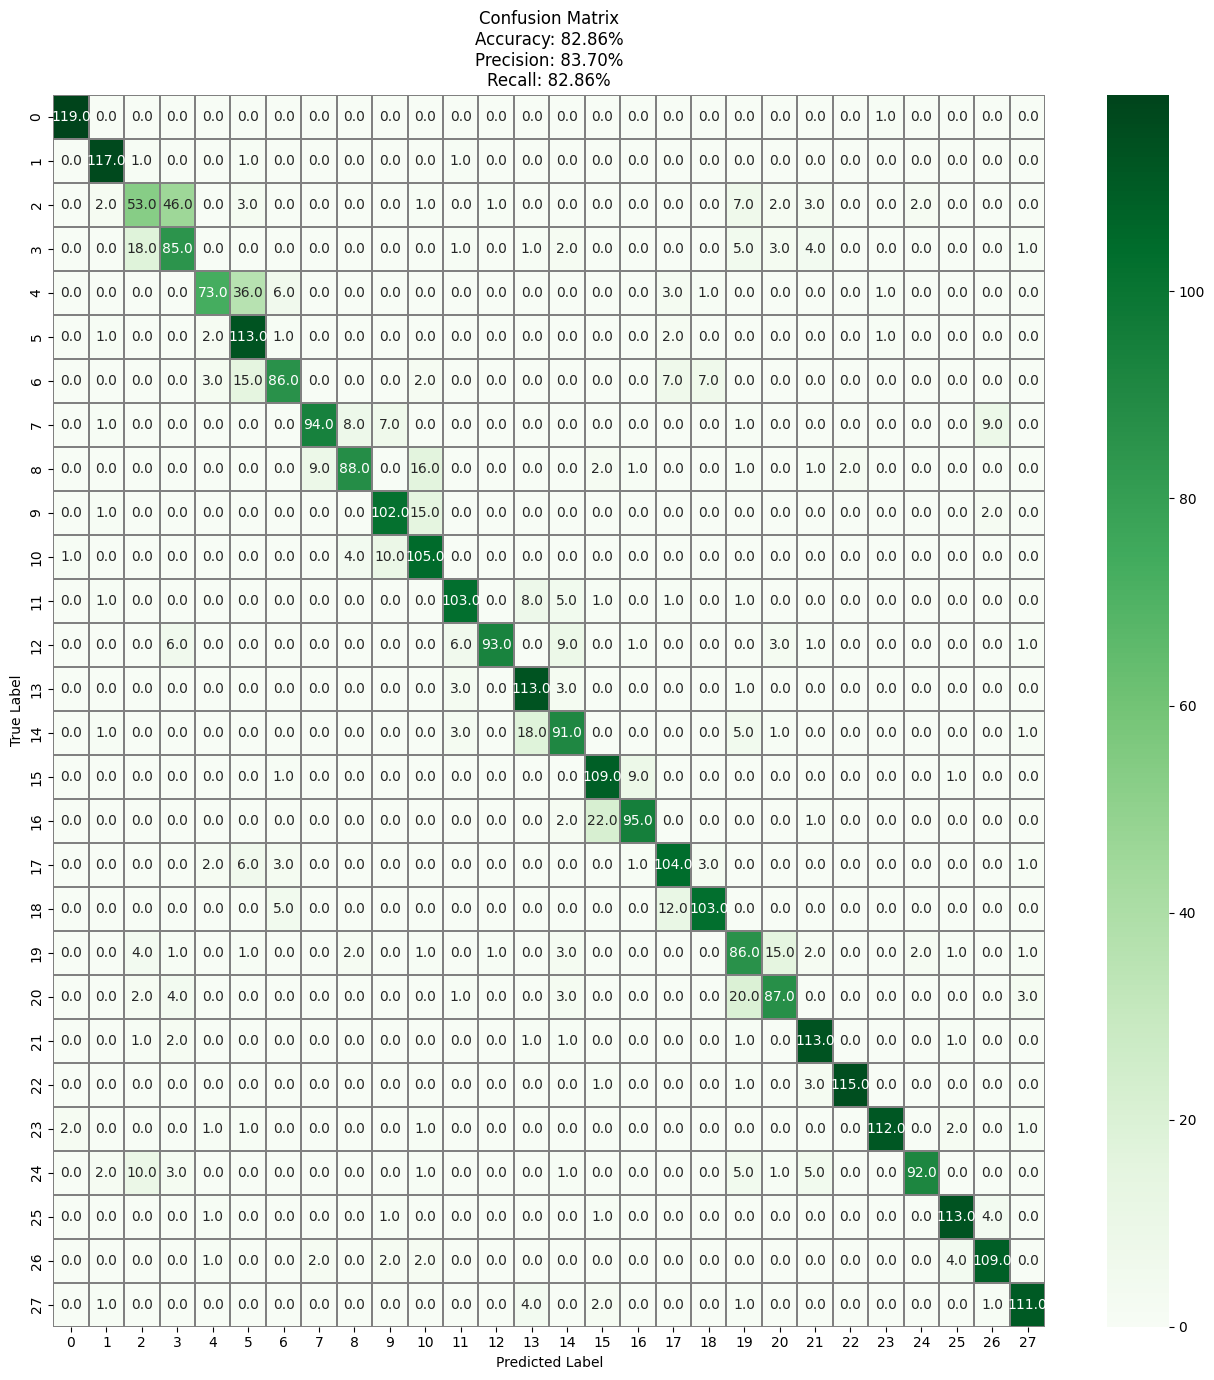

In [53]:
# Find the model performance and confusion matrix for testing dataset
performance(model, x_test, y_test)

<hr>

## Conclusions:
<table>
    <thead>
        <tr>
            <th>Features</th>
            <th>Custom CNN (No Augmentation)</th>
            <th>Custom CNN (With Augmentation)</th>
            <th>Non-pretrained MobileNet</th>
            <th>Pre-trained ResNet</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Number of layers (with weights)</b></td>
            <td>5</td>
            <td>5</td>
            <td>55</td>
            <td><b>62 (60 frozen)</b></td>
        </tr>
        <tr>
            <td><b>Frozen layers (with weights)</b></td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td><b>60</b></td>
        </tr>
        <tr>
            <td><b>Trainable parameters</b></td>
            <td><b>51,492,252 (196.43 MB)</b></td>
            <td><b>51,492,252 (196.43 MB)</b></td>
            <td>4,231,400 (16.14 MB)</td>
            <td>27,184 (106.19 KB)</td>
        </tr>
        <tr>
            <td><b>Non-trainable parameters</b></td>
            <td>0 (0.00 Byte)</td>
            <td>0 (0.00 Byte)</td>
            <td>21,888 (85.50 KB)</td>
            <td><b>300,996 (1.15 MB)</b></td>
        </tr>
        <tr>
            <td><b>Data Augmentation</b></td>
            <td>False</td>
            <td>True</td>
            <td>True</td>
            <td>True</td>
        </tr>
        <tr>
            <td><b>Training Time</b></td>
            <td>72m</td>
            <td><b>94m</b></td>
            <td>58m</td>
            <td><b>20m</b></td>
        </tr>
        <tr>
            <td><b>Training Accuracy</b></td>
            <td><b>0.9944</b></td>
            <td>0.9666</td>
            <td>0.9124</td>
            <td>0.8203</td>
        </tr>
        <tr>
            <td><b>Training Loss</b></td>
            <td><b>0.0164</b></td>
            <td>0.1048</td>
            <td>0.2572</td>
            <td>0.8161</td>
        </tr>
        <tr>
            <td><b>Validation Accuracy</b></td>
            <td>0.9487</td>
            <td><b>0.9762</b></td>
            <td>0.8720</td>
            <td>0.8155</td>
        </tr>
        <tr>
            <td><b>Validation Loss</b></td>
            <td>0.2742</td>
            <td><b>0.1005</b></td>
            <td>0.3737</td>
            <td>0.8022</td>
        </tr>
        <tr>
            <td><b>Testing Accuracy</b></td>
            <td>0.9449</td>
            <td><b>0.9756</b></td>
            <td>0.8869</td>
            <td>0.8286</td>
        </tr>
        <tr>
            <td><b>Testing Precision</b></td>
            <td>0.9464</td>
            <td><b>0.9763</b></td>
            <td>0.9001</td>
            <td>0.8370</td>
        </tr>
        <tr>
            <td><b>Testing Recall</b></td>
            <td>0.9449</td>
            <td><b>0.9756</b></td>
            <td>0.8869</td>
            <td>0.8286</td>
        </tr>
    </tbody>
</table>



### Optimization Configuration:
- Adam optimizer with a learning rate of 0.001 was employed across all models.
- Categorical crossentropy served as the chosen loss function, with accuracy used as the metric for model evaluation.
- Zero padding was used for convolution layers.
- Max pool 2*2 window size with 1 stride was used in my custom model.
- ReLU activation function was applied.
- Softmax was used at the end layers of all models.
- Dropout layers were implemented to prevent overfitting on the data.

### Training Hyperparameters:
- A consistent batch size of 250 and 30 epochs were used for all models.
- To enhance results, especially for tasks 3 and 4, increasing the number of epochs is recommended.

### Data Augmentation:
- Data augmentation was implemented for tasks 2, 3, and 4 to prevent overfitting on the training images.

### Task 2 Custom CNN with Data Augmentation:
- Achieved superior validation and testing results.
- Processing time was relatively long at 94 minutes due to a large number of trainable parameters (51,492,252).
- Upon applying data augmentation:
  - The accuracy curve in the plot shows that the validation curve surpasses the training curve.
  - In the loss curve, the validation curve is lower than the training curve.
- These trends suggest that the utilization of data augmentation has a positive impact on the model training process:
    - The higher accuracy in the validation curve indicates that data augmentation helps prevent overfitting.
    - The lower loss in the validation curve further supports the notion that data augmentation contributes to improved results.

### Task 1 Custom CNN:
- Best accuracy and lower loss on training data, indicating a potential overfitting issue.

### Layer Considerations:
- The number of layers corresponds to the count of layers with trainable parameters.

## Task 3: Choosing between published CNN architectures:
- Initially, I opted for VGG16 from [Keras](https://keras.io/api/applications/) due to its lower layer count.
- However, VGG16 yielded unsatisfactory results in training, validation, and testing, attributed to its 528MB of trainable parameters and 16 layers.
- In comparison, our custom 5-layer model with 196.43MB trainable parameters outperformed VGG16.
- You can find out the result of VGG16 model at the end of this notebook.
- For better alternatives, consider models like LeNet-5 (7 layers) or AlexNet (8 layers).
- I did not use LeNet-5 or AlexNet due to the lack of Keras support, necessitating the use of alternative libraries.

## Task 3: Non-Pretrainable MobileNet V1 Model
- The non-pretrainable MobileNet V1 model utilized in Task 3 comprises 55 layers, significantly more than our custom CNN with only 5 layers.
- Despite its extensive layer count, it boasts fewer trainable parameters.
- However, in scenarios with a high number of layers and a small dataset, this may lead to less favorable results compared to other models.
- I used **VGG16** that has less number of layers in **[Keras](https://keras.io/api/applications/)**, but it gave us the worst results in training, validation and testing data, that beacuse it has 528MB trainable paramters in addition to 16 layers, if we compare it with out custom model with 5 layer with 196.43MB trainable paramters, its so bad with number of layers and the number of weights, so its good if you choose models like **LeNet-5 ( 7 layers) or AlexNet (8 layers)**, i didn't use it beacuse its **not supported with keras** and i must use another libraries.

### Task 4 Pre-trained ResNet:
- Utilized a pre-trained ResNet architecture with 62 layers.
- 60 layers were frozen, leaving only 2 layers trainable, resulting in 27,184 weights to train.
- Training time reduced to 20 minutes, showcasing efficiency and a minimal number of trainable parameters.

### Fine-tuning Strategies:
- Unfroze all fully connected layers (including softmax layer) and the top convolutional layer.
- Justification: Dataset size proximity to the pre-trained dataset, allowing for fine-tuning without risking underfitting.
- This approach aids in adjusting feature extraction for Arabic characters, as the pre-trained dataset primarily consists of English characters and numbers.


**For the given ACHR dataset, a CNN model with fewer layers and augmented data to prevent overfitting yielded the most favorable results compared to other models.**


<hr>

# VGG16 CNN Model (Just to confirm)

In [23]:
# Create an input layer with the specified shape
input_tensor = Input(shape=(32, 32, 1))

# Get MobileNet model without weights
base_model = VGG16(weights=None, include_top=True, input_tensor=input_tensor)

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [24]:
# number of characters
num_classes = 28

# Delete the last softmax layer from MobileNet
# then add our softmax layer with the specified number of classes
output_layer = Dense(num_classes, activation='softmax')(base_model.layers[-2].output)

# Create the custom model
model = Model(inputs=base_model.input, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [25]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [26]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
48/48 [==============================] - 553s 11s/step - loss: 3.3333 - accuracy: 0.0338 - val_loss: 3.3331 - val_accuracy: 0.0312
Epoch 2/30
48/48 [==============================] - 536s 11s/step - loss: 3.3325 - accuracy: 0.0345 - val_loss: 3.3335 - val_accuracy: 0.0312
Epoch 3/30
48/48 [==============================] - 536s 11s/step - loss: 3.3324 - accuracy: 0.0337 - val_loss: 3.3334 - val_accuracy: 0.0283
Epoch 4/30
48/48 [==============================] - 538s 11s/step - loss: 3.3324 - accuracy: 0.0344 - val_loss: 3.3333 - val_accuracy: 0.0312
Epoch 5/30
48/48 [==============================] - 534s 11s/step - loss: 3.3323 - accuracy: 0.0357 - val_loss: 3.3334 - val_accuracy: 0.0312
Epoch 6/30
48/48 [==============================] - 540s 11s/step - loss: 3.3322 - accuracy: 0.0349 - val_loss: 3.3334 - val_accuracy: 0.0290
Epoch 7/30
48/48 [==============================] - 535s 11s/step - loss: 3.3322 - accuracy: 0.0349 - val_loss: 3.3338 - val_accuracy: 0.0275
Epoch 

In [27]:
model.save('task3_VGG16.h5')

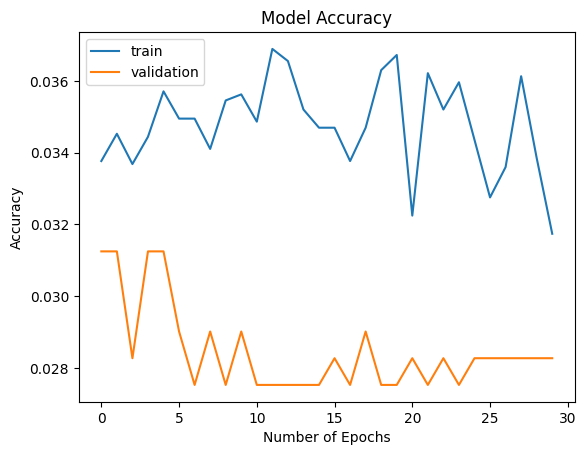

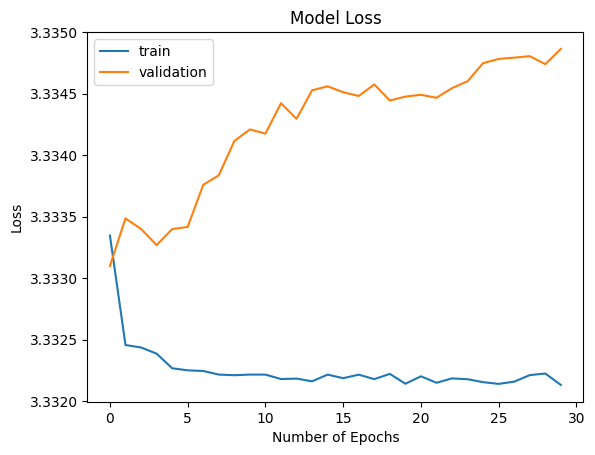

In [28]:
# Plot the accuracy and loss per epoch for the training and validation dataset
plot_accuracy_and_loss_curves(history)

105/105 [==============================] - 21s 202ms/step


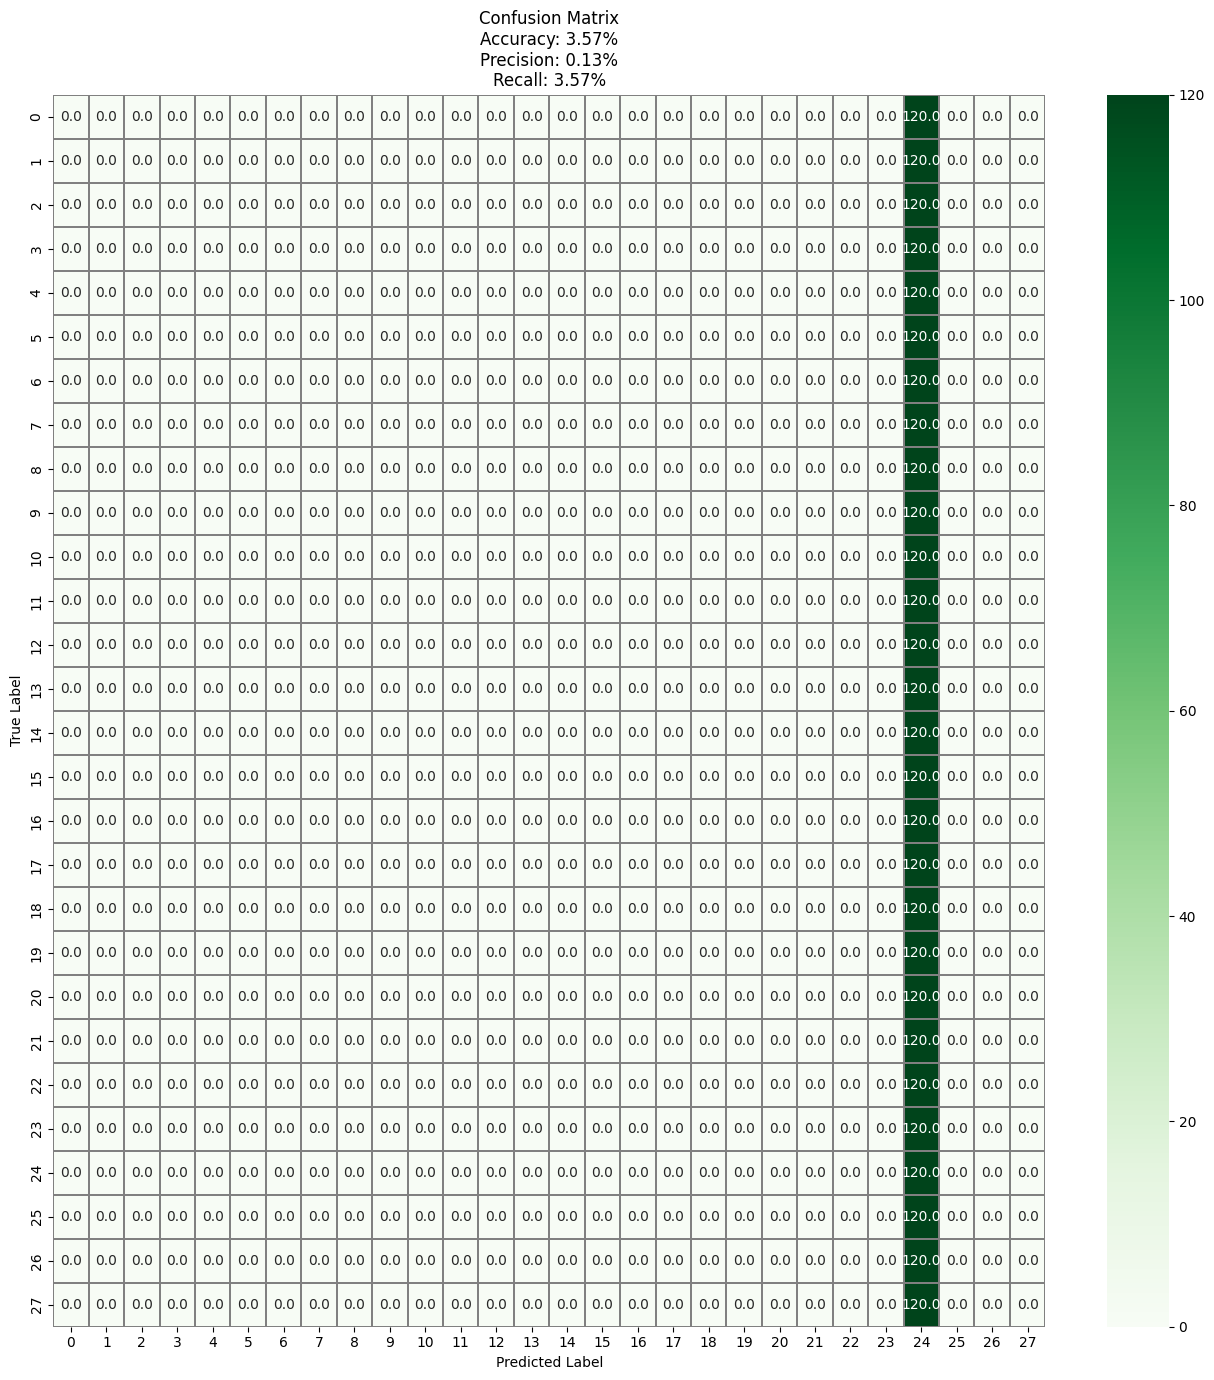

In [29]:
# Find the model performance and confusion matrix for testing dataset
performance(model, x_test, y_test)